In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from highlight_text import fig_text
from PIL import Image
import urllib.request
from io import BytesIO

df = pd.read_csv("TotalPLayers.csv", delimiter = ";")
df.head()

,Club,EuroPlayers,CopaPlayers,TotalPlayers
0,Inter,13,3,16
1,Real Madrid,12,4,16
2,PSG,12,3,15
3,Man City,13,1,14
4,Barcelona,11,2,13


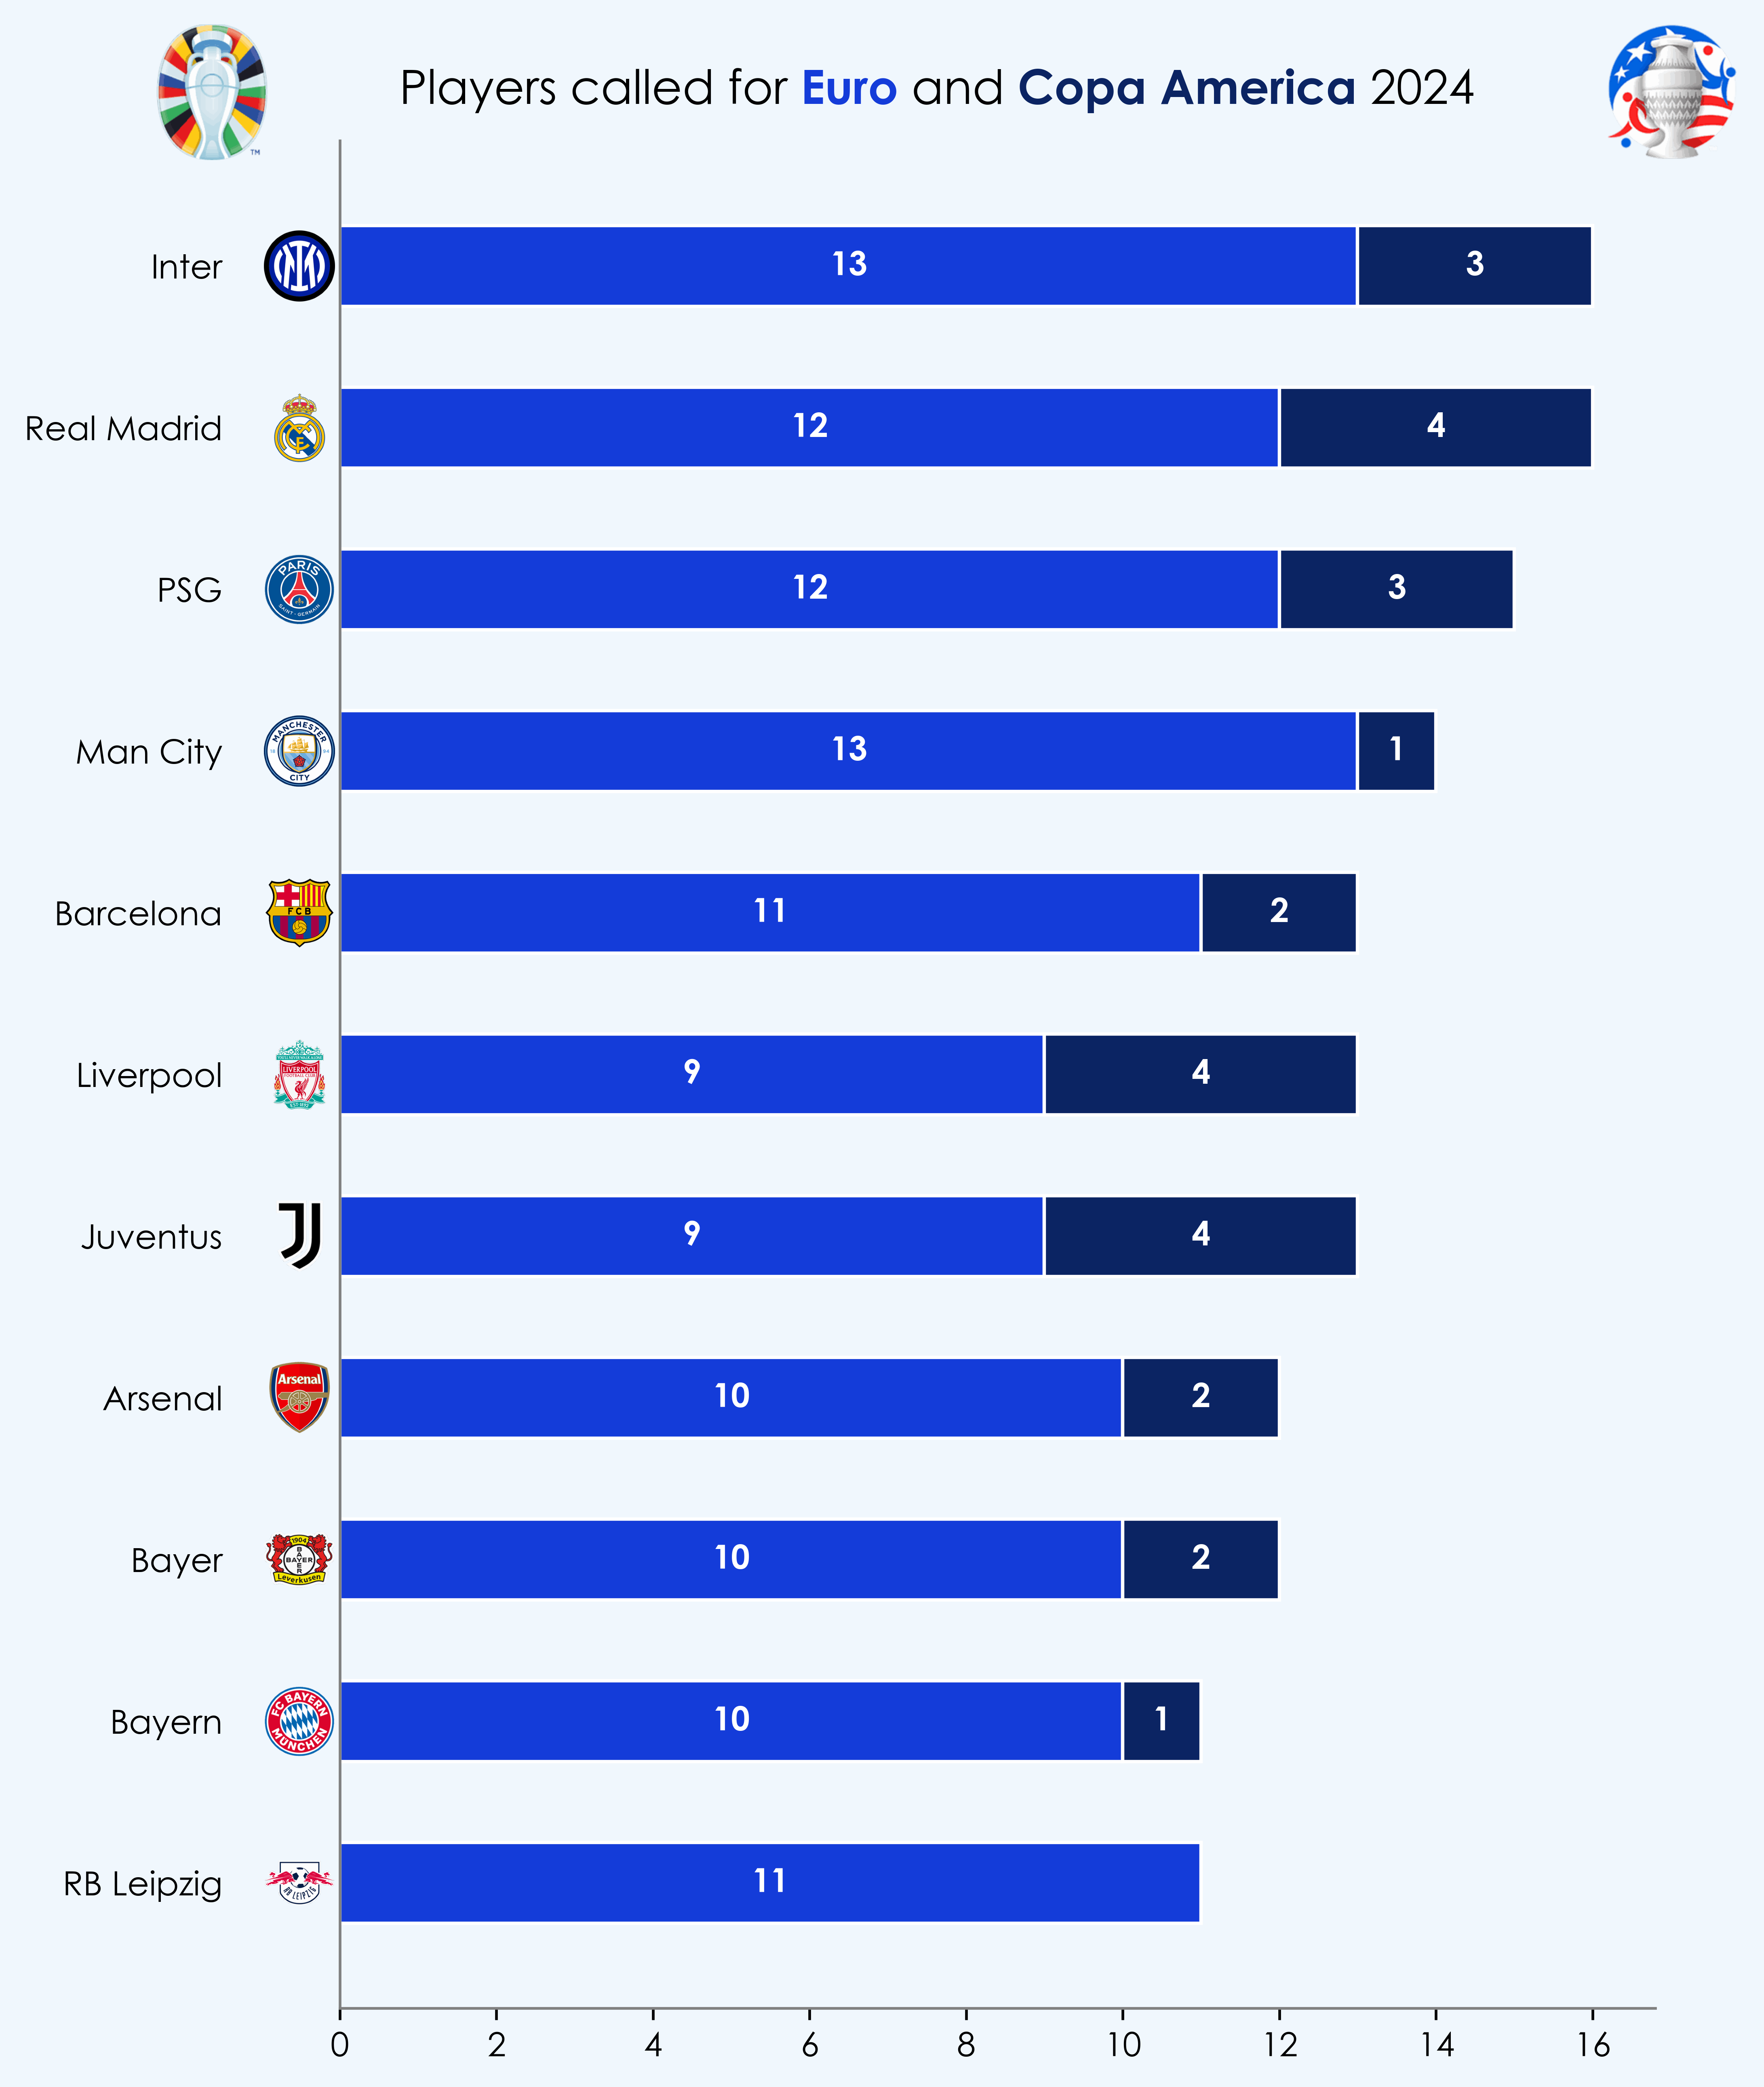

In [18]:
# Correct logo paths
logo_paths = {
    'Inter': 'logos/8636.png',
    'Real Madrid': 'logos/8633.png',
    'PSG': 'logos/9847.png',
    'Man City': 'logos/8456.png',
    'Barcelona': 'logos/8634.png',
    'Liverpool': 'logos/8650.png',
    'Juventus': 'logos/9885.png',
    'Arsenal': 'logos/9825.png',
    'Bayer': 'logos/8178.png',
    'Bayern': 'logos/9823.png',
    'RB Leipzig': 'logos/178475.png'
}

bg_color = "#f0f7fd"
bar_color_euro = "#143cd9"
bar_color_copa = "#0b2463"
text_color = "white"

plt.rcParams["font.family"] = "Century Gothic"

# Sort the DataFrame by TotalPlayers in descending order and select the top 10 clubs
top_clubs = df.sort_values(by='TotalPlayers', ascending=False).head(11)

# Extract data for plotting
clubs = top_clubs['Club']
euro_players = top_clubs['EuroPlayers']
copa_players = top_clubs['CopaPlayers']

# Bar positions (reverse the order to have the biggest values on top)
bar_positions = range(len(clubs))

# Create the plot with a larger height
fig, ax = plt.subplots(figsize=(7, 10), dpi = 600, facecolor=bg_color)  # Adjust the figure size (width, height)
ax.set_facecolor(bg_color)  # Set the background color inside the plot

# Plot the stacked bars
bar_width = 0.5  # Adjust bar width
bars_euro = ax.barh(bar_positions, euro_players, color=bar_color_euro, edgecolor='white', height=bar_width)
bars_copa = ax.barh(bar_positions, copa_players, left=euro_players, color=bar_color_copa, edgecolor='white', height=bar_width)

# Add labels, title, and legend
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.set_yticks(bar_positions,[])
ax.set_yticklabels(clubs, position=(-.08, 0))  # Adjust y-tick label position
ax.tick_params(axis='y', which='both', length=0)  # Remove y-axis ticks
ax.invert_yaxis()  # Invert y-axis to have the biggest values on top

fig_text(
    x=0.16, y=0.91,
    s="Players called for <Euro> and <Copa America> 2024",
    highlight_textprops=[
        {"color": bar_color_euro, "weight": "bold"},
        {"color": bar_color_copa, "weight": "bold"}
    ],
    color="black",
    size=14,
    family="Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

# Add numbers in the middle of the bars
for euro, copa, pos in zip(euro_players, copa_players, bar_positions):
    if euro > 0:
        ax.text(euro / 2, pos, str(euro), va='center', ha='center', color=text_color, weight="bold", fontsize=10)
    if copa > 0:
        ax.text(euro + copa / 2, pos, str(copa), va='center', ha='center', color=text_color, weight="bold", fontsize=10)

# Add club logos between the club names and the bars
for club, pos in zip(clubs, bar_positions):
    logo_path = logo_paths.get(club)
    if logo_path:
        img = plt.imread(logo_path)
        imagebox = OffsetImage(img, zoom=0.11)  # Adjust zoom level as needed
        ab = AnnotationBbox(imagebox, (0, pos), frameon=False, xybox=(-12, 0), xycoords='data', boxcoords="offset points", pad=0)
        ax.add_artist(ab)

logo_ax = fig.add_axes([0.01, 0.86, 0.08, 0.08], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/dark/50.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

logo_ax = fig.add_axes([0.87, 0.86, 0.08, 0.08], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/dark/44.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

# Show the plot
plt.savefig('result.png', dpi=400, bbox_inches = 'tight')
plt.show()